In [1]:
import pandas as pd
df=pd.read_csv(r"D:\titanic-passengers.csv", encoding="ISO-8859-1", sep=";")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [2]:
df.isnull().sum().sum()

866

In [3]:
df['Cabin'].fillna(df['Cabin'].mode(),inplace=True)
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
890,428,Yes,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S


C:\Users\Cyril\AppData\Local\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


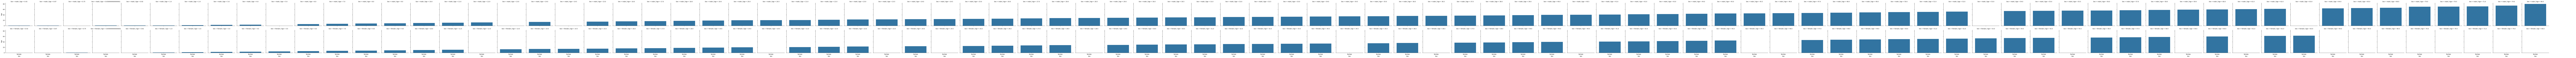

In [4]:
import seaborn as sns
grid = sns.FacetGrid(df,row="Sex",col="Age")
grid.map(sns.barplot,"Sex",'Age',errorbar=None)
grid.add_legend()

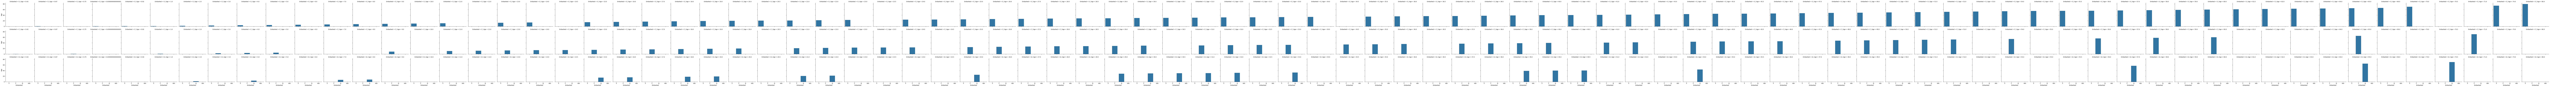

In [5]:
import seaborn as sns
grid = sns.FacetGrid(df,row="Embarked",col="Age")
grid.map(sns.barplot,"Embarked",'Age',order=df['Embarked'].unique(),errorbar=None)
grid.add_legend()

C:\Users\Cyril\AppData\Local\Temp\ipykernel_14044\1761025665.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


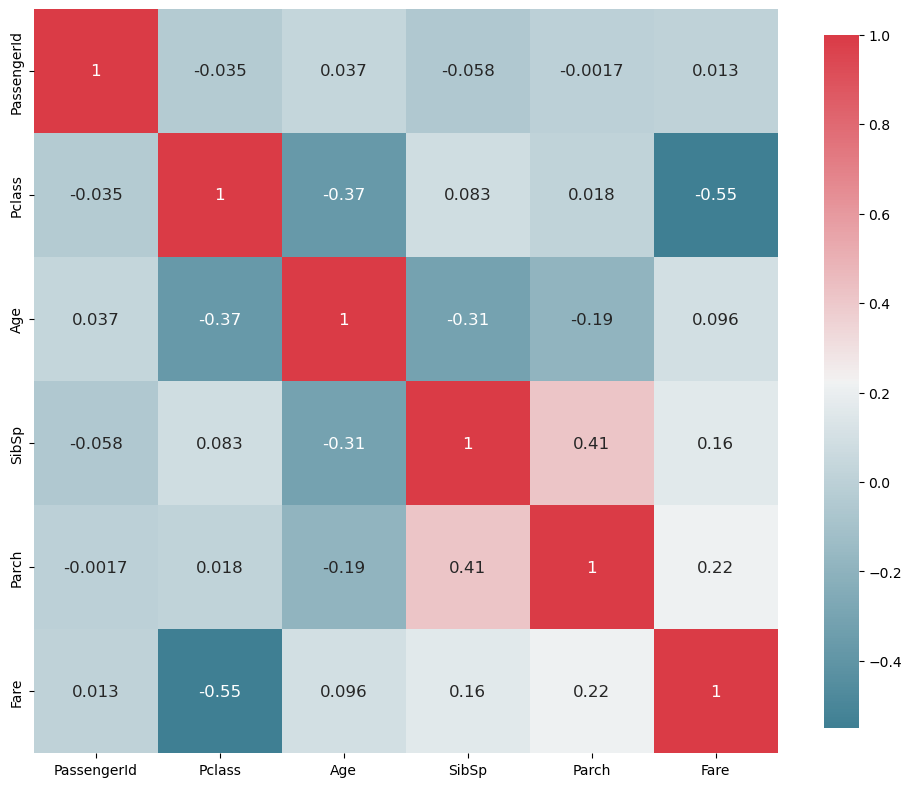

In [6]:
import matplotlib.pyplot as plt

def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr,
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )
    
plot_correlation_map(df)

In [8]:
cleanup={"Survived":{"yes":1,"no":0}}
df.replace(cleanup,inplace=True)
print(df[["Survived","Pclass"]])
df[["Survived","Pclass"]].groupby(['Pclass'],as_index=True).mean()

    Survived  Pclass
0         No       2
1         No       3
2         No       3
3         No       3
4         No       1
..       ...     ...
886      Yes       2
887       No       3
888       No       3
889       No       3
890      Yes       2

[891 rows x 2 columns]


C:\Users\Cyril\AppData\Local\Temp\ipykernel_14044\2980174301.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[["Survived","Pclass"]].groupby(['Pclass'],as_index=True).mean()


""
Pclass
1
2
3


The function is used to establish the correlation between the elements of the matrix. It shows that the more the value tends towards 1, the stronger the correlation is positive. 
The correlation between Pclass and PassengerId is relatively weak
Parch and Fare is weak
SibSp and Parch is close to 1 so positive
SibSp and Age is negative so the correlation is negative
Age and Fare is negative so the correlation is negative
Pclass and Fare is negative so the correlation is negative
the more it tends towards 0, the weaker the correlation
the more it tends towards a negative value, the stronger the correlation is negative.